In [22]:
import pandas as pd
from io import StringIO

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Load Branch Level Data and Member Level Data
df1 = pd.read_csv("Florida_County_Info - Sheet1.csv")
df1.rename(columns={'Count': 'County'}, inplace=True)

In [23]:
import pandas as pd
from io import StringIO

# Your modified comma-separated data
data_comma_separated = """Rank,County,Total Small Business Establishments,Establishments per 1,000 Residents,Share
1,Santa Rosa,3,209,16.6,99.8%
2,Hendry,681,16.9,99.9%
3,Washington,426,17.1,99.5%
4,Putnam,1,276,17.2,99.8%
5,Madison,314,17.4,100.0%
6,Polk,13,130,17.4,99.7%
7,Jackson,823,17.5,99.5%
8,Hernando,3,657,18.2,99.9%
9,Citrus,2,895,18.3,99.8%
10,Levy,810,18.3,100.0%
11,Pasco,11,112,19.0,99.9%
12,Osceola,7,707,19.1,99.8%
13,Clay,4,263,19.2,99.9%
14,Taylor,403,19.4,99.8%
15,Jefferson,282,19.5,100.0%
16,St. Lucie,6,750,19.6,99.9%
17,Highlands,2,043,19.8,100.0%
18,Marion,7,801,20.3,99.9%
19,Flagler,2,484,20.6,100.0%
20,Columbia,1,452,20.8,99.9%
21,Lake,8,333,21.0,99.9%
22,Okeechobee,868,21.7,99.8%
23,Nassau,2,071,21.9,100.0%
24,Charlotte,4,308,22.1,100.0%
25,Escambia,7,399,22.9,99.9%
26,Alachua,6,509,23.1,99.8%
27,Gulf,343,23.7,99.7%
28,Brevard,15,008,24.3,99.8%
29,Volusia,13,856,24.5,99.9%
30,Manatee,10,377,25.1,99.9%
31,Franklin,309,25.4,100.0%
32,St. Johns,7,692,26.2,99.9%
33,Lee,21,184,26.8,99.9%
34,Leon,7,932,26.8,99.9%
35,Okaloosa,5,789,27.1,99.9%
36,Duval,27,373,27.3,99.7%
37,Bay,4,989,27.8,99.9%
38,Hillsborough,41,277,27.8,99.7%
39,Indian River,4,626,28.2,99.9%
40,Orange,43,056,30.2,99.7%
41,Seminole,14,666,31.1,99.8%
42,Pinellas,30,937,32.3,99.8%
43,Sarasota,15,192,33.9,100.0%
44,Broward,67,026,34.6,99.8%
45,Collier,13,535,35.0,99.9%
46,Miami-Dade,94,470,35.4,99.9%
47,Palm Beach,53,680,35.7,99.9%
48,Walton,2,965,37.1,99.9%
49,Martin,6,041,37.7,99.9%
50,Monroe,4,009,48.7,100.0%"""

# Read the data into a Pandas DataFrame
df2 = pd.read_csv(StringIO(data_comma_separated))

# Display the DataFrame
print(df2)

    Rank        County  Total Small Business Establishments  \
0      1    Santa Rosa                                    3   
1      2        Hendry                                  681   
2      3    Washington                                  426   
3      4        Putnam                                    1   
4      5       Madison                                  314   
5      6          Polk                                   13   
6      7       Jackson                                  823   
7      8      Hernando                                    3   
8      9        Citrus                                    2   
9     10          Levy                                  810   
10    11         Pasco                                   11   
11    12       Osceola                                    7   
12    13          Clay                                    4   
13    14        Taylor                                  403   
14    15     Jefferson                                 

In [24]:
print(df1.columns)
print(df2.columns)

Index(['Rank', 'County', 'Per Capita Income', 'Median Household Income',
       'Median Family Income', 'Population', 'Number of households'],
      dtype='object')
Index(['Rank', 'County', 'Total Small Business Establishments',
       'Establishments per 1', '000 Residents', 'Share'],
      dtype='object')


In [25]:
# Merge the datasets based on "BranchCategory" column
merged_data = pd.merge(df1, df2, on="County")

# List of columns to remove dollar signs and commas
columns_to_clean = ['Per Capita Income', 'Median Household Income', 'Median Family Income', 'Number of households', 'Population']

# Loop through columns and remove dollar signs and commas
for column in columns_to_clean:
    merged_data[column] = merged_data[column].str.replace('[\$,]', '', regex=True)
    
merged_data['Share'] = pd.to_numeric(merged_data['Share'].str.rstrip('%'), errors='coerce')
merged_data = merged_data.drop(['Rank_x', 'Rank_y'], axis=1)

merged_data = merged_data.set_index('County')
merged_data = merged_data.apply(pd.to_numeric, errors='coerce')
merged_data = merged_data.fillna(0)



    
merged_data

,Per Capita Income,Median Household Income,Median Family Income,Population,Number of households,Total Small Business Establishments,Establishments per 1,000 Residents,Share
County,,,,,,,,,
Collier,37046,58106,68556,321520,133179,13,535.0,35.0,99.9
St. Johns,36027,62663,79080,190039,75338,7,692.0,26.2,99.9
Martin,35772,53210,70271,146318,63899,6,41.0,37.7,99.9
Monroe,35516,53821,66152,73090,32629,4,9.0,48.7,100.0
Palm Beach,33610,53242,64445,1320134,544227,53,680.0,35.7,99.9
Sarasota,33045,49388,62326,379448,175746,15,192.0,33.9,100.0
Indian River,31918,47341,57477,138028,60176,4,626.0,28.2,99.9
Seminole,29795,58971,70597,422718,164706,14,666.0,31.1,99.8
Lee,29445,50014,58950,618754,259818,21,184.0,26.8,99.9


In [26]:
# Check the data types of each column
print(merged_data.dtypes)

Per Capita Income                        int64
Median Household Income                  int64
Median Family Income                     int64
Population                               int64
Number of households                     int64
Total Small Business Establishments      int64
Establishments per 1                   float64
000 Residents                          float64
Share                                  float64
dtype: object


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your DataFrame is named 'df'
# X contains the features, and y contains the target variable (Share)
X = merged_data.drop('Share', axis=1)
y = merged_data['Share']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')




Mean Squared Error: 4.05014420000003
R-squared: 0.9974629656599885


In [28]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


# Assuming your DataFrame is named 'data'
# Set the target variable
target_column = 'Total Small Business Establishments'
y = merged_data[target_column]

# Set the features
X = merged_data.drop([target_column], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f'R-squared: {r2}')



Mean Squared Error: 3276.4634699999997
R-squared: -0.7920696296531593


In [29]:
# Get feature importances to find the total small business establishments
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print(feature_importance_df)

                   Feature  Importance
4     Number of households    0.249772
3               Population    0.227100
7                    Share    0.184812
0        Per Capita Income    0.118398
6            000 Residents    0.113761
5     Establishments per 1    0.066783
2     Median Family Income    0.026293
1  Median Household Income    0.013082


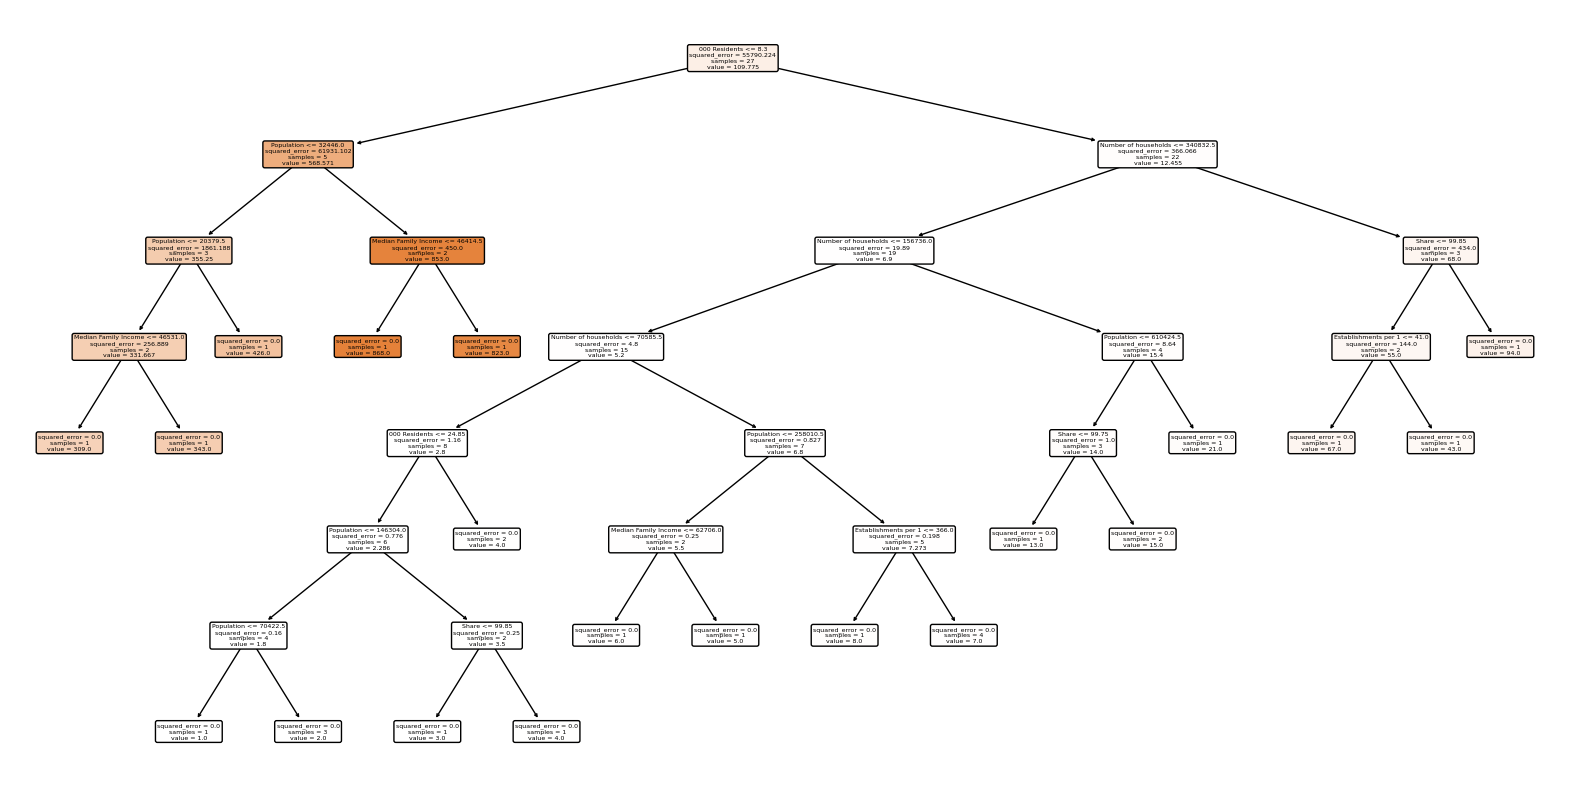

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming your model is already trained and named 'model'
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=X.columns, filled=True, rounded=True, class_names=['Not Churn', 'Churn'])
plt.show()


In [31]:
#same thing for household income
# Set the target variable
target_column = 'Median Household Income'
y = merged_data[target_column]

# Set the features
X = merged_data.drop([target_column], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f'R-squared: {r2}')

# Get feature importances to find the total small business establishments
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print(feature_importance_df)


Mean Squared Error: 3396910.9731400004
R-squared: -93.08873485439912
                               Feature  Importance
0                    Per Capita Income    0.482313
1                 Median Family Income    0.409756
5                 Establishments per 1    0.030898
2                           Population    0.026087
6                        000 Residents    0.024572
3                 Number of households    0.016499
4  Total Small Business Establishments    0.008206
7                                Share    0.001668


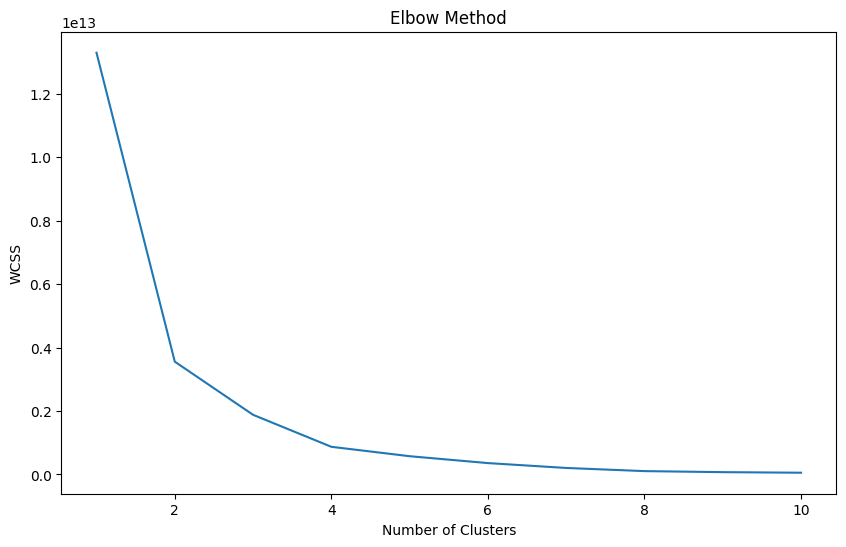

          County  Cluster
0        Collier        0
1      St. Johns        0
2         Martin        0
3         Monroe        0
4     Palm Beach        1
5       Sarasota        0
6   Indian River        0
7       Seminole        0
8            Lee        1
9         Nassau        0
10      Pinellas        1
11       Broward        2
12      Okaloosa        0
13       Manatee        0
14        Walton        0
15       Brevard        1
16  Hillsborough        1
17     Charlotte        0
18          Clay        0
19         Duval        1
20          Leon        0
21        Orange        1
22    Santa Rosa        0
23          Lake        0
24           Bay        0
25       Flagler        0
26       Volusia        0
27       Alachua        0
28         Pasco        0
29      Escambia        0
30     St. Lucie        0
31    Miami-Dade        2
32      Hernando        0
33        Citrus        0
34        Marion        0
35          Polk        1
36      Franklin        0
37       Osc

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the cleaned data

# Drop non-numeric columns and set X (features)
X = merged_data.select_dtypes(include=['float64', 'int64'])

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

# Based on the Elbow method, choose the optimal number of clusters and fit the model
optimal_clusters = 3  # You can choose the number based on the Elbow method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X)

# Add the cluster labels to your DataFrame
merged_data['Cluster'] = kmeans.labels_

merged_data.reset_index(inplace=True)


# Display the cluster assignments
print(merged_data[['County', 'Cluster']])


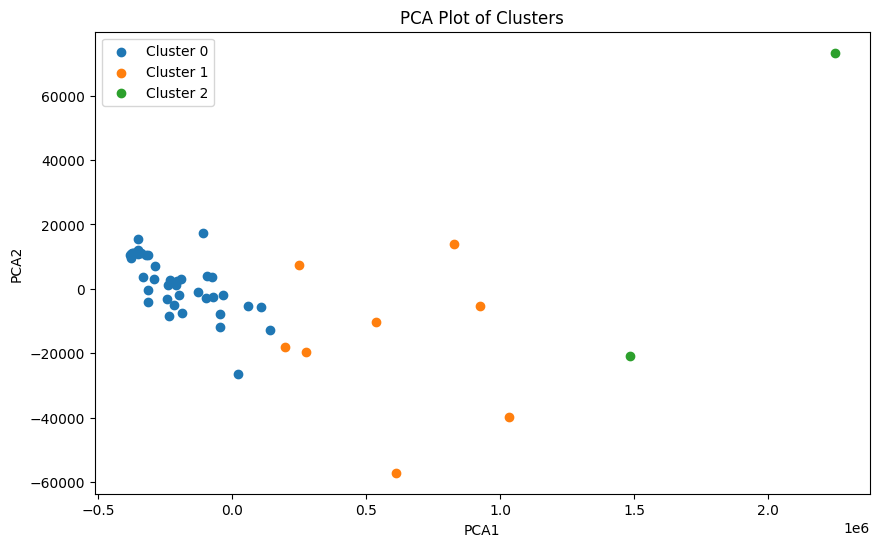

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have a DataFrame named 'merged_data' with 'Cluster' column
# Extract numerical columns for PCA
numerical_data = merged_data.select_dtypes(include=['float64', 'int64'])

# Perform PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_data)

# Add the 'Cluster' column to the reduced data
pca_data = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_data['Cluster'] = merged_data['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 6))

for cluster in pca_data['Cluster'].unique():
    cluster_data = pca_data[pca_data['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.title('PCA Plot of Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()



Mean Squared Error: 8.470329472543003e-22
R-squared: 1.0


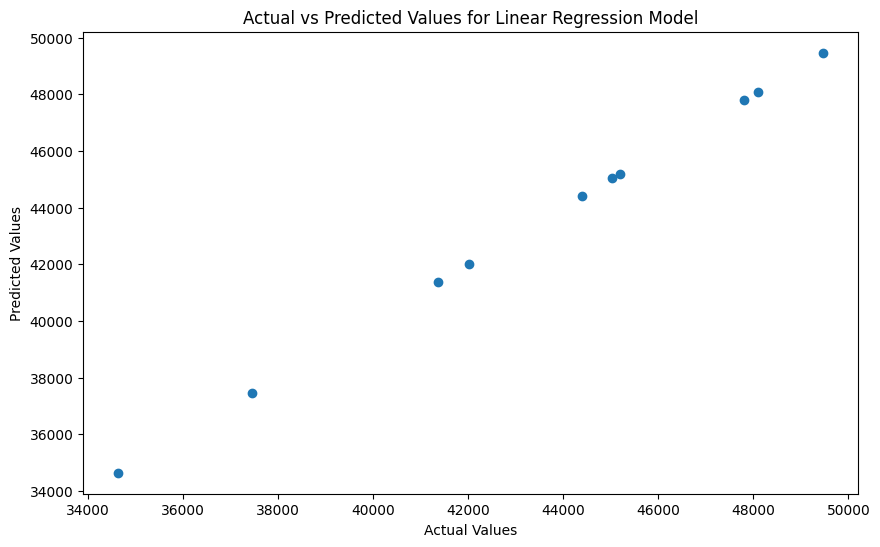

In [34]:
#Linear Regression Model

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming your dataset is named 'data'
# Features
X = merged_data[['Per Capita Income', 'Median Household Income', 'Median Family Income', 'Population', 'Number of households', 'Total Small Business Establishments', 'Share']]

# Target variable
y = merged_data['Median Household Income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f'R-squared: {r2}')

# Plot predicted vs actual values
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Linear Regression Model")
plt.show()


Theta: [1.12172433 1.97729306]


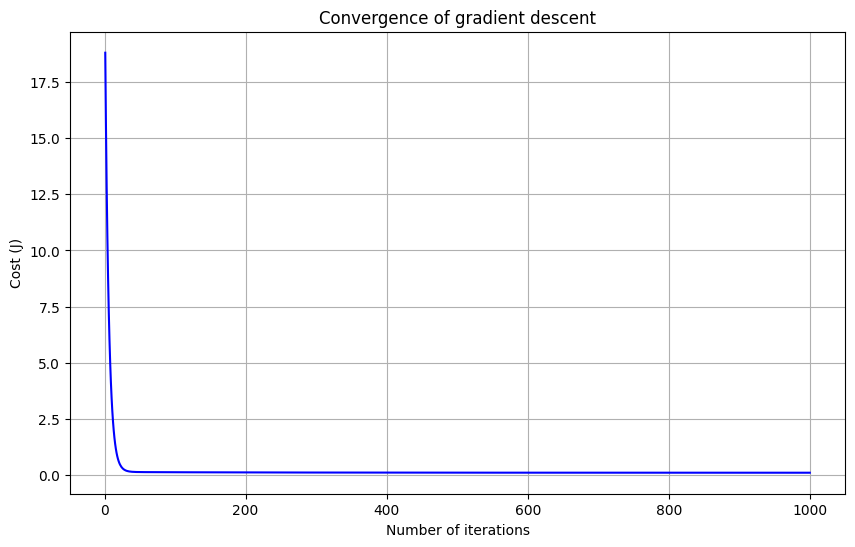

In [35]:
#Gradient Descent Algorithm
import numpy as np
import matplotlib.pyplot as plt

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    squared_errors = (predictions - y) ** 2
    cost = 1 / (2 * m) * np.sum(squared_errors)
    return cost

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)

    for iteration in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = X.T.dot(errors) / m
        theta = theta - learning_rate * gradient
        cost_history[iteration] = compute_cost(X, y, theta)

    return theta, cost_history

# Sample data
X = np.column_stack((np.ones(50), np.linspace(0, 5, 50)))
y = 2 * X[:, 1] + 1 + np.random.normal(scale=0.5, size=50)

# Initialize parameters
theta = np.zeros(2)

# Learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
X_b = X  # Add intercept term
theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, num_iterations)

# Print the final parameters
print("Theta:", theta)

# Plot the cost history
plt.plot(range(1, num_iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()
